In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('/content/eda_structuring_with_python_dataset1.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229795 entries, 0 to 229794
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               229795 non-null  object
 1   number_of_strikes  229795 non-null  int64 
 2   center_point_geom  229795 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229795 entries, 0 to 229794
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               229795 non-null  datetime64[ns]
 1   number_of_strikes  229795 non-null  int64         
 2   center_point_geom  229795 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.3+ MB


In [6]:
df.shape

(229795, 3)

In [7]:
df.size

689385

In [8]:
df.drop_duplicates().shape

(229795, 3)

In [9]:
# locations with most strikes in a day
df.sort_values(by='number_of_strikes', ascending=False)

,date,number_of_strikes,center_point_geom
11517,2018-02-10,1899,POINT(-95.5 28.1)
24906,2018-02-25,1833,POINT(-98.7 28.9)
24825,2018-02-25,1741,POINT(-98 29)
12688,2018-02-11,1686,POINT(-88.7 29)
24907,2018-02-25,1655,POINT(-98.6 28.9)
...,...,...,...
28535,2018-03-18,23,POINT(-71.9 32.6)
37733,2018-04-07,23,POINT(-92.3 30.3)
98636,2018-06-05,23,POINT(-73.7 23.1)
91130,2018-06-01,23,POINT(-86.4 35.2)


In [10]:
# sort_values() are used to arrange elements of series or dataframe in ascending or descending order. ascending=True or False.
# value_counts() are used to count unique elements in a panda series.

In [11]:
# locations with most days with at least one lightning strike
df.center_point_geom.value_counts()

center_point_geom
POINT(-80.3 26.7)    20
POINT(-80.9 28.6)    19
POINT(-80.4 26.1)    19
POINT(-81.1 28.6)    19
POINT(-81 28.6)      18
                     ..
POINT(-94.6 25.4)     1
POINT(-67.2 37.7)     1
POINT(-67.3 37.7)     1
POINT(-67.5 37.7)     1
POINT(                1
Name: count, Length: 79031, dtype: int64

In [12]:
# identify the top 20 locations with most days of lightning
df.center_point_geom.value_counts().head(20)

center_point_geom
POINT(-80.3 26.7)    20
POINT(-80.9 28.6)    19
POINT(-80.4 26.1)    19
POINT(-81.1 28.6)    19
POINT(-81 28.6)      18
POINT(-82.2 28)      18
POINT(-80.2 26.7)    18
POINT(-80.3 27)      18
POINT(-85.6 30.4)    18
POINT(-80.4 27)      17
POINT(-82.3 22.9)    17
POINT(-80.3 26.9)    17
POINT(-80.9 28.8)    17
POINT(-82.4 22.9)    16
POINT(-80.2 26.9)    16
POINT(-81 28.5)      16
POINT(-94.3 30.9)    16
POINT(-93.9 31.1)    16
POINT(-80.3 26.8)    16
POINT(-94.2 30.9)    16
Name: count, dtype: int64

In [13]:
# same value but in a dataframe with column names
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,POINT(-80.3 26.7),20
1,POINT(-80.9 28.6),19
2,POINT(-80.4 26.1),19
3,POINT(-81.1 28.6),19
4,POINT(-81 28.6),18
5,POINT(-82.2 28),18
6,POINT(-80.2 26.7),18
7,POINT(-80.3 27),18
8,POINT(-85.6 30.4),18
9,POINT(-80.4 27),17


In [15]:
# lightning strikes by day of week.
# create two new columns 'week' and 'weekday'
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


In [16]:
# now we can calculate the mean number of lightning strikes for each weekday of the year.
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,58.106479
Monday,64.916388
Saturday,63.521394
Sunday,65.331106
Thursday,62.051337
Tuesday,65.154285
Wednesday,61.590538


In [17]:
# it seems that Saturday and Sunday have fewer lightning strikes on average than the other five weekdays. We will plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot.

# We will begin by defining the order of the days, starting with Monday and ending with Sunday. This is how the days will be ordered in the plot we create.

# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

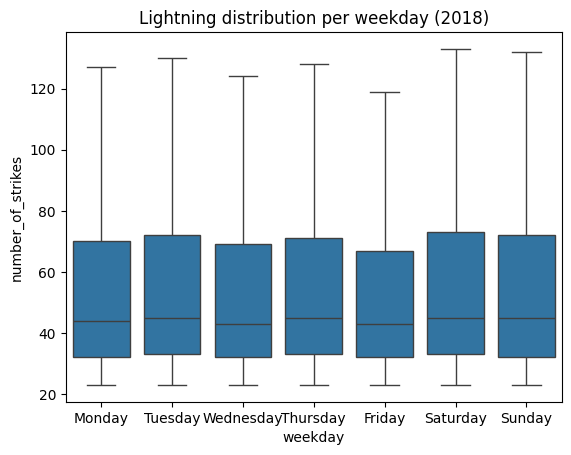

In [18]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df,
            x='weekday',
            y='number_of_strikes',
            order=weekday_order,
            showfliers=False
            );
g.set_title('Lightning distribution per weekday (2018)');

In [ ]:
# Monthly lightning strikes 2016–2018
# Finally, we will examine monthly lightning strike data from 2016–2018.
# We will calculate the percentage of total lightning strikes for each year that occurred in a given month. We will then plot this data on a bar graph.

In [19]:
# Import 2016–2017 data
df_2 = pd.read_csv('eda_structuring_with_python_dataset2.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


In [20]:
# Convert `date` column to datetime.
df_2['date'] = pd.to_datetime(df_2['date'])

In [21]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [22]:
# To help us name the bars of the bar plot, we will create three new columns that isolate the year, month number, and month name.
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


In [23]:
# Let's check the overall lightning strike count for each year.
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,32313419
2017,25061818
2018,14491543


In [24]:
# Now we will calculate the percentage of total lightning strikes that occurred in a given month for each year and assign the results to a new dataframe called lightning_by_month.
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2112616
1,April,2017,3141994
2,April,2018,832286
3,August,2016,5457610
4,August,2017,4156744


In [25]:
# We can use the agg() function to calculate the same yearly totals we found before, with 2017 having fewer strikes than the other two years.
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

,year,year_strikes
0,2016,32313419
1,2017,25061818
2,2018,14491543


In [26]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2112616,32313419
1,August,2016,5457610,32313419
2,December,2016,220163,32313419
3,February,2016,216483,32313419
4,January,2016,210802,32313419


In [27]:
# Now we will create a new column in our new dataframe that represents the percentage of total lightning strikes that occurred during each month for each year. We will do this by dividing the number_of_strikes column by the year_strikes column and multiplying the result by 100.
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2112616,32313419,6.537891
1,August,2016,5457610,32313419,16.889609
2,December,2016,220163,32313419,0.681336
3,February,2016,216483,32313419,0.669948
4,January,2016,210802,32313419,0.652367


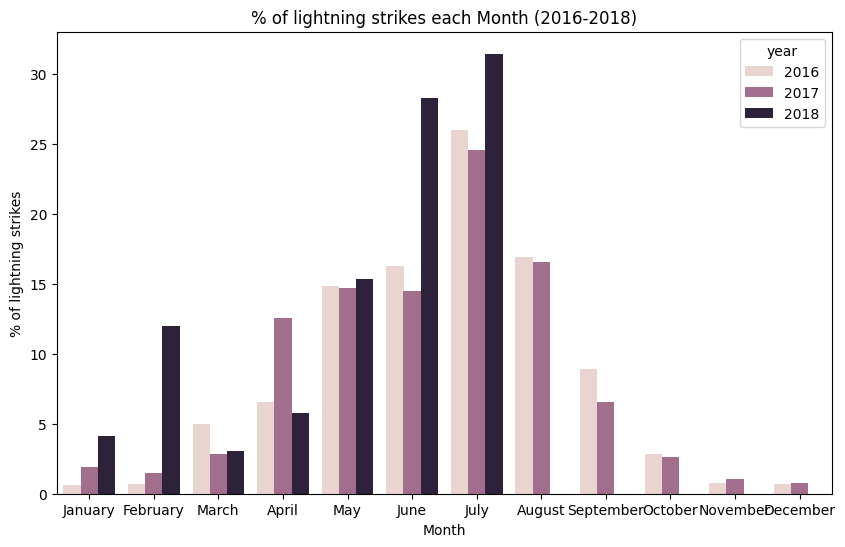

In [28]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");